In [1]:
# for CAL OEHHA
# acquire data, annual means, trends

In [113]:
import matplotlib as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore') #filter some warning messages

In [155]:
iurl = 'https://shorestations.ucsd.edu/plots/'
urls = ['Trinidad_TEMP.csv','PacificGrove_TEMP.csv','SIO_TEMP.csv']
inirow = [31,28,26] # row number of YEAR label (start in 0)
varnam_file = ['TRINIDAD_BAY_SURF_TEMP_C','SURF_TEMP_C','SURF_TEMP_C']
varnam_out = ['Trinidad Bay','Pacific Grove','La Jolla']
colrs=['tab:blue','olive','tab:red']

In [156]:
def ssp_ameans(url, vname1, vname2,irow):

    # acquire data
    pdt = pd.read_csv(url, header=irow)
    pdt=pdt[~np.isnan(pdt.YEAR)]

    iy = int(pdt.at[0,'YEAR'])
    fy = int(pdt.at[len(pdt)-1,'YEAR'])
    yrs = list()
    sst = list()
    
    a = pdt[vname1]=='18U'
    pdt[vname1][a]=np.nan
    pdt=pdt.astype({vname1: 'float'})

    for yr in range(iy,fy+1):
        tmp = pdt[pdt['YEAR']==yr]
        tmp = tmp[vname1]
        try: 
            t = np.nanmean(tmp)
        except:
            t = np.nan
        sst.append(t)
        yrs.append(yr)
    apdt = pd.DataFrame(data=sst, index=yrs, columns=[vname2])
    return apdt

In [157]:
for i in range(3):
    tmp = ssp_ameans(iurl+urls[i],varnam_file[i],varnam_out[i],inirow[i])
    if i==0:
        ssp_sst = tmp.copy()
    else:
        ssp_sst = pd.concat([ssp_sst,tmp],axis=1)
ssp_sst = (ssp_sst * 9/5) + 32

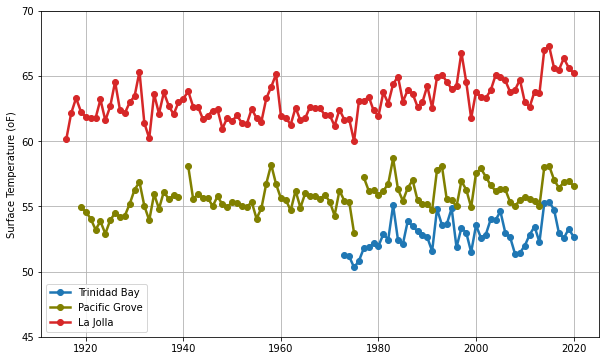

In [158]:
plt.figure(figsize=(10,6))
for i in range(3):
    plt.plot(ssp_sst.index,ssp_sst[varnam_out[i]], 'o-',label=varnam_out[i],c=colrs[i],lw=2.5)
plt.legend(loc=3)
plt.ylim([45,70])
plt.grid(True)
plt.ylabel('Surface Temperature (oF)')
plt.show()

In [159]:
def calculate_trend(x,y,iy,fy):
    # first degree polynomial
    polf = PolynomialFeatures(1)
    # select years
    a = (x>=iy) & (x<=fy)
    x = x[a]
    y = y[a]
    
    # get rid of nan years
    a = ~np.isnan(y)
    y2=y[a]
    x2=x[a]
    y2 = y2.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)

    # calculate years
    xp = polf.fit_transform(x2)
    mods2 = sm.OLS(y2,xp).fit()
    trend = mods2.params[1]*10
    p_tr = mods2.pvalues[1]

    return trend, p_tr, x2[0][0], x2[-1][0]

In [160]:
# lenght of time series trend
for i in range(3):
    y = ssp_sst[varnam_out[i]].values
    x = ssp_sst.index.values
    trend, p_tr, iy, fy = calculate_trend(x,y,x[0],x[-1])
    print(varnam_out[i])
    print(trend, p_tr, iy,fy)

Trinidad Bay
0.33319759024840456 0.00655599344906327 1973 2020
Pacific Grove
0.18501963130974783 4.951607624549687e-07 1919 2020
La Jolla
0.27717029121265163 1.5127160529635948e-10 1916 2020


In [161]:
# for the 1973-2020 common period
for i in range(3):
    y = ssp_sst[varnam_out[i]].values
    x = ssp_sst.index.values
    trend, p_tr, iy, fy = calculate_trend(x,y,1973,2020)
    print(varnam_out[i])
    print(trend, p_tr, iy,fy)

Trinidad Bay
0.33319759024840456 0.00655599344906327 1973 2020
Pacific Grove
0.15220215758213917 0.20157725800046442 1973 2020
La Jolla
0.6549805474020698 1.949501952423484e-06 1973 2020


In [162]:
# for the 1981-2020 common period
for i in range(3):
    y = ssp_sst[varnam_out[i]].values
    x = ssp_sst.index.values
    trend, p_tr, iy, fy = calculate_trend(x,y,1980,2020)
    print(varnam_out[i])
    print(trend, p_tr, iy,fy)

Trinidad Bay
0.07903958940810668 0.5858416126679306 1980 2020
Pacific Grove
0.05400476131594251 0.6984991072870725 1980 2020
La Jolla
0.5212790288533775 0.0013940755727910165 1980 2020


In [163]:
# for the 1981-2020 common period
for i in range(3):
    y = ssp_sst[varnam_out[i]].values
    x = ssp_sst.index.values
    trend, p_tr, iy, fy = calculate_trend(x,y,1950,2016)
    print(varnam_out[i])
    print(trend, p_tr, iy,fy)

Trinidad Bay
0.4329967537363011 0.0026318652079682144 1973 2016
Pacific Grove
0.161322925358926 0.01877217180043057 1950 2016
La Jolla
0.4943513297229024 2.31194559888799e-09 1950 2016


In [164]:
for i in range(3):
    y = ssp_sst[varnam_out[i]].values
    x = ssp_sst.index.values
    trend, p_tr, iy, fy = calculate_trend(x,y,2000,2016)
    print(varnam_out[i])
    print(trend, p_tr, iy,fy)

Trinidad Bay
0.593935671953354 0.3475613557027586 2000 2016
Pacific Grove
-0.3065191535512257 0.58023302384382 2000 2016
La Jolla
1.1956597468066743 0.059399861421939586 2000 2016
